<a href="https://colab.research.google.com/github/imymemineyay/Mini-Project-4/blob/main/%ED%97%AC%EB%A9%A7_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat Jun 17 09:15:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/drive
Mounted at /content/gdrive
 Data_Folder   Public_Transportation		     yolov3
'My Drive'     QGIS수업_영현선생님_투비컨티뉴.gdoc  '한열정 취뽀회 🗃️'
 My_GitHub     Shinhan_AI_Comp			    '헬멧 detection.ipynb'


## **깃헙 YOLOv3 클론**

In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 5 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.19 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


## **Nvidia GPU 사용하며 Darknet 컴파일하기**

In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (

## **custom한 cfg darknet에 생성시키기**

- /mydrive/yolov3/data/yolov3_testing.cfg 복사해서 cfg/yolov3_training.cfg 생성

In [8]:
!cp /mydrive/yolov3/data/yolov3_testing.cfg cfg/yolov3_training.cfg

## **custom한 obj.names 와 data 파일을 darknet쪽에 붙여넣기**

In [9]:
!echo -e '' > data/obj.names
!echo -e '' > data/obj.data
!cp /mydrive/yolov3/data/obj.names data/obj.names
!cp /mydrive/yolov3/data/obj.data data/obj.data
!mkdir data/obj

## **darknet weights파일 다운받기**

In [10]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-06-17 09:24:09--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  18.2MB/s    in 9.4s    

2023-06-17 09:24:20 (16.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## **darknet의 data/obj 폴더안에 이미지 zip 파일 압축해제하기**

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
 extracting: data/obj/README.dataset.txt  
 extracting: data/obj/README.roboflow.txt  
   creating: data/obj/test/
 extracting: data/obj/test/-108_png.rf.a28128fe48262e975121f2c50b05f9eb.jpg  
 extracting: data/obj/test/-108_png.rf.a28128fe48262e975121f2c50b05f9eb.txt  
 extracting: data/obj/test/-114_png.rf.3e7437af8f2185573310b878214c4483.jpg  
 extracting: data/obj/test/-114_png.rf.3e7437af8f2185573310b878214c4483.txt  
 extracting: data/obj/test/-141_png.rf.dd9791134d06d4b88c3806ad30f9dbcb.jpg  
 extracting: data/obj/test/-141_png.rf.dd9791134d06d4b88c3806ad30f9dbcb.txt  
 extracting: data/obj/test/-149_png.rf.d7771d0780ac102f7a7a7432bf0b3278.jpg  
 extracting: data/obj/test/-149_png.rf.d7771d0780ac102f7a7a7432bf0b3278.txt  
 extracting: data/obj/test/-18_png.rf.5e2217a4fe41d770bf7455656e3985c9.jpg  
 extracting: data/obj/test/-18_png.rf.5e2217a4fe41d770bf7455656e3985c9.txt  
 extracting: data/obj/test/-25_png.rf.28616cdfe720af359395c4c5b0169870

## **images_list내에 학습시킬 이미지 저장**

In [ ]:
import glob
images_list = glob.glob("data/obj/train/*.jpg")
print(images_list)

['data/obj/train/img151_png.rf.941af6bf66eadb2c84fa09d9e2f5dc34.jpg', 'data/obj/train/-13_png.rf.498ee984fae31da7fa7bf8c57bb06802.jpg', 'data/obj/train/img262_png.rf.d1c06bc50f17179f14185ac3fe49b927.jpg', 'data/obj/train/163_png.rf.15047cb6f5a0bdff3f8b3c93a198db78.jpg', 'data/obj/train/-63_png.rf.eb3a987635369f816e22a7ac2c413577.jpg', 'data/obj/train/-70_png.rf.999a7d265e7354297d643964e841fa73.jpg', 'data/obj/train/post_2341988949527718589_png.rf.488880261dad9f31deaaddc4391ae72a.jpg', 'data/obj/train/-37_png.rf.12168fb438773555539ce7182732ff01.jpg', 'data/obj/train/post_2341988949527718589_png.rf.423d1dab0d836ebdd07e7cedd2bc9142.jpg', 'data/obj/train/img262_png.rf.c82ddf154af89c95947026d24db385dd.jpg', 'data/obj/train/img158_png.rf.d929a6fe6ac3517c56e6453691b02ded.jpg', 'data/obj/train/-101_png.rf.1d2eb914beb63c1f14120320bb25806d.jpg', 'data/obj/train/131_png.rf.e92d78a5e3e9ec5c36c0ad43edcf39a7.jpg', 'data/obj/train/90_png.rf.dfe441b50f1dc062b2dfd1e5b1257053.jpg', 'data/obj/train/fd604

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w")
file.write("\n".join(images_list))
file.close()

In [ ]:
file = open("data/train.txt", "r")
contents = file.read()
file.close()

print(contents)


data/obj/train/img151_png.rf.941af6bf66eadb2c84fa09d9e2f5dc34.jpg
data/obj/train/-13_png.rf.498ee984fae31da7fa7bf8c57bb06802.jpg
data/obj/train/img262_png.rf.d1c06bc50f17179f14185ac3fe49b927.jpg
data/obj/train/163_png.rf.15047cb6f5a0bdff3f8b3c93a198db78.jpg
data/obj/train/-63_png.rf.eb3a987635369f816e22a7ac2c413577.jpg
data/obj/train/-70_png.rf.999a7d265e7354297d643964e841fa73.jpg
data/obj/train/post_2341988949527718589_png.rf.488880261dad9f31deaaddc4391ae72a.jpg
data/obj/train/-37_png.rf.12168fb438773555539ce7182732ff01.jpg
data/obj/train/post_2341988949527718589_png.rf.423d1dab0d836ebdd07e7cedd2bc9142.jpg
data/obj/train/img262_png.rf.c82ddf154af89c95947026d24db385dd.jpg
data/obj/train/img158_png.rf.d929a6fe6ac3517c56e6453691b02ded.jpg
data/obj/train/-101_png.rf.1d2eb914beb63c1f14120320bb25806d.jpg
data/obj/train/131_png.rf.e92d78a5e3e9ec5c36c0ad43edcf39a7.jpg
data/obj/train/90_png.rf.dfe441b50f1dc062b2dfd1e5b1257053.jpg
data/obj/train/fd604a3767346a3d602b48c0a51ef8d8_png.rf.aa5ec8d96

## **이미지 학습시키기**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.534840), count: 1, class_loss = 0.183628, iou_loss = 0.063201, total_loss = 0.246829 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000004, iou_loss = 0.000000, total_loss = 0.000004 
 total_bbox = 79276, rewritten_bbox = 0.000000 % 
]2;3535/4200: loss=0.7 hours left=0.1
 3535: 0.700410, 0.752503 avg loss, 0.000100 rate, 0.986167 seconds, 28280 images, 0.124923 hours left
Loaded: 0.000081 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.873131), count: 19, class_loss = 0.899590, iou_loss = 0.266261, total_loss = 1.165851 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.851781), count: 1, class_loss = 0.175168, iou_loss = 0.006145, total_loss = 0.181313 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 A

## **테스트해보기**

In [12]:
!./darknet detect cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights /mydrive/yolov3/images_for_test/01.30079878.1.jpg -dont_show

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

In [17]:
import cv2
import numpy as np

def load_model(img_path):
    # Load YOLO model
    net = cv2.dnn.readNet('/mydrive/yolov3/yolov3_training_last.weights', 'cfg/yolov3_training.cfg')

    # Load class labels
    classes = []
    with open("data/obj.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]

    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        return
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Perform object detection
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Process the detected objects
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # Coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x - 70, y + 40), font, 3, color, 3, cv2.LINE_AA)

    cv2.imwrite("output.jpg", img)
    print("Output image saved as output.jpg")


In [18]:
load_model('/mydrive/yolov3/images_for_test/01.30079878.1.jpg')

Output image saved as output.jpg


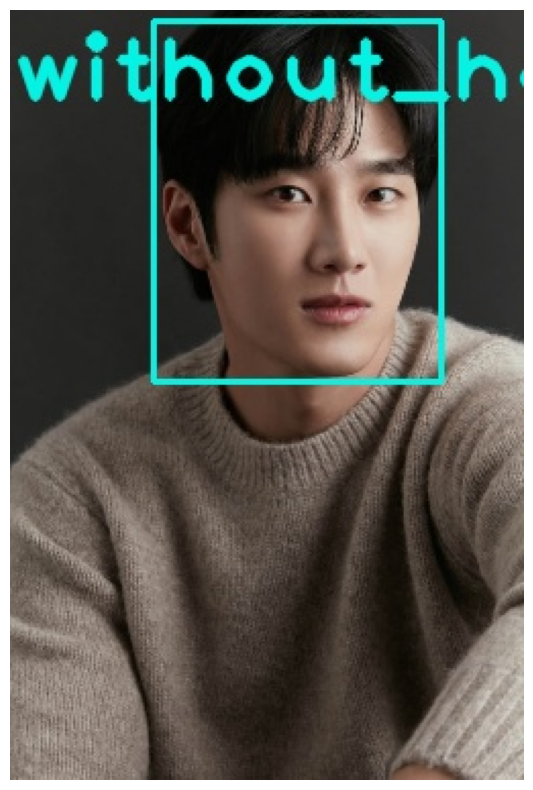

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load the output image
img = cv2.imread('output.jpg')

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
